In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
#df = pd.read_excel(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\student-mat3new.XLSX''')

In [2]:
df = pd.read_excel(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\student-mat3new2.XLSX''')
df.head()


,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
0,0,0,18,1,1,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,1,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,0,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,1,1,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,1,1,1,3,3,1,1,...,4,3,2,1,2,5,4,6,10,1


In [ ]:
#df = pd.read_csv(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\Student Matematic.XLSX''')
#df.head()


In [ ]:
#df = pd.read_csv(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\student-mat.csv''')
#df.head()


In [ ]:
#df.to_excel('Student Matematic.xlsx', index=False)

In [3]:
conditions = [
    (df['target'] >= 1),
    (df['target'] <= 0)
        ]
values = ['Passed', 'Failed']
df['Score'] = np.select(conditions, values)
df.head()

,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,target,Score
0,0,0,18,1,1,0,4,4,0,4,...,3,4,1,1,3,6,5,6,0,Failed
1,0,0,17,1,1,1,1,1,0,1,...,3,3,1,1,3,4,5,5,0,Failed
2,0,0,15,1,0,1,1,1,0,1,...,3,2,2,3,3,10,7,8,1,Passed
3,0,0,15,1,1,1,4,2,2,3,...,2,2,1,1,5,2,15,14,1,Passed
4,0,0,16,1,1,1,3,3,1,1,...,3,2,1,2,5,4,6,10,1,Passed


In [4]:
#df = df.drop([ 'G3', 'target'],axis='columns')
df = df.drop(['target'],axis='columns')
df.head()

,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Score
0,0,0,18,1,1,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,Failed
1,0,0,17,1,1,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,Failed
2,0,0,15,1,0,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,Passed
3,0,0,15,1,1,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,Passed
4,0,0,16,1,1,1,3,3,1,1,...,4,3,2,1,2,5,4,6,10,Passed


In [5]:
inputs = df.drop('Score',axis='columns')
target = df['Score']
inputs.head()

,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,1,0,4,4,0,4,...,1,4,3,4,1,1,3,6,5,6
1,0,0,17,1,1,1,1,1,0,1,...,1,5,3,3,1,1,3,4,5,5
2,0,0,15,1,0,1,1,1,0,1,...,1,4,3,2,2,3,3,10,7,8
3,0,0,15,1,1,1,4,2,2,3,...,0,3,2,2,1,1,5,2,15,14
4,0,0,16,1,1,1,3,3,1,1,...,1,4,3,2,1,2,5,4,6,10


In [6]:
from sklearn.model_selection import train_test_split # Import train_test_split function
pred_train, pred_test, tar_train, tar_test = train_test_split(inputs, target, test_size=0.25, random_state=0)

In [7]:
tar_train.value_counts()

Passed    205
Failed    192
Name: Score, dtype: int64

In [8]:
tar_test.value_counts()


Failed    73
Passed    60
Name: Score, dtype: int64

In [9]:
model = DecisionTreeClassifier(random_state=0)
classifier = model.fit(pred_train,tar_train)
classifier

DecisionTreeClassifier(random_state=0)

In [10]:
# feature importance
classifier.feature_importances_

array([0.        , 0.        , 0.01613468, 0.        , 0.00733555,
       0.        , 0.        , 0.        , 0.00756479, 0.01300494,
       0.01512957, 0.        , 0.01396663, 0.00672425, 0.        ,
       0.00840988, 0.02017276, 0.00756479, 0.        , 0.02077314,
       0.        , 0.        , 0.0053794 , 0.0151716 , 0.01659469,
       0.00978073, 0.00226944, 0.02049514, 0.00185681, 0.        ,
       0.01487368, 0.77679751])

In [11]:
predictions = classifier.predict(pred_test)
predictions

array(['Failed', 'Failed', 'Failed', 'Passed', 'Failed', 'Passed',
       'Failed', 'Passed', 'Passed', 'Failed', 'Failed', 'Failed',
       'Failed', 'Passed', 'Failed', 'Passed', 'Failed', 'Passed',
       'Passed', 'Failed', 'Passed', 'Passed', 'Failed', 'Passed',
       'Passed', 'Failed', 'Passed', 'Failed', 'Passed', 'Failed',
       'Failed', 'Passed', 'Failed', 'Passed', 'Passed', 'Failed',
       'Passed', 'Passed', 'Failed', 'Passed', 'Failed', 'Failed',
       'Failed', 'Failed', 'Failed', 'Passed', 'Passed', 'Failed',
       'Failed', 'Passed', 'Failed', 'Failed', 'Failed', 'Failed',
       'Passed', 'Passed', 'Failed', 'Failed', 'Passed', 'Passed',
       'Failed', 'Passed', 'Failed', 'Failed', 'Passed', 'Failed',
       'Failed', 'Failed', 'Failed', 'Failed', 'Passed', 'Failed',
       'Failed', 'Passed', 'Passed', 'Failed', 'Failed', 'Passed',
       'Failed', 'Failed', 'Failed', 'Passed', 'Failed', 'Passed',
       'Passed', 'Failed', 'Passed', 'Passed', 'Failed', 'Pass

In [12]:
#accuracy tanpa tuning
from sklearn import metrics
print(metrics.accuracy_score(tar_test, predictions))

0.9172932330827067


              precision    recall  f1-score   support

      Failed       0.89      0.97      0.93        73
      Passed       0.96      0.85      0.90        60

    accuracy                           0.92       133
   macro avg       0.92      0.91      0.92       133
weighted avg       0.92      0.92      0.92       133

[[71  2]
 [ 9 51]]


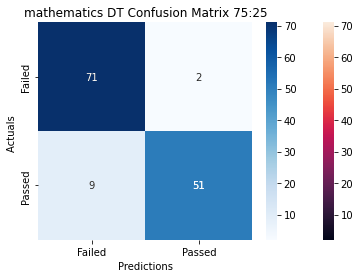

In [13]:
#Get the confusion matrix tanpa bagging
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
print(classification_report(tar_test, predictions))

cf_matrix1 = confusion_matrix(tar_test, predictions)
print(cf_matrix1)

import seaborn as sns
sns.heatmap(cf_matrix1, annot=True)
ax = sns.heatmap(cf_matrix1, annot=True,fmt="d", cmap='Blues')

ax.set_title('mathematics DT Confusion Matrix 75:25');
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals ');

ax.xaxis.set_ticklabels(['Failed', 'Passed'])
ax.yaxis.set_ticklabels(['Failed', 'Passed'])
plt.show()

In [14]:
# MCC score 1 Decision tree tanpa bagging
from sklearn.metrics import matthews_corrcoef
mcc_score = matthews_corrcoef(tar_test, predictions)
print("Matthews Correlation Coefficient:", mcc_score)

Matthews Correlation Coefficient: 0.8360731539087948


In [ ]:
#print("accuracy of training dataset is{:.2f}".format(classifier.score(pred_train,tar_train)))
#print("accuracy of test dataset is {:.2f}".format(classifier.score(pred_test,tar_test)))
#accuracy
#print("Accuracy is",accuracy_score(tar_test, predictions, normalize = True))

In [ ]:
# Untuk Gridsearch tuning parameter
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RandomizedSearchCV
#Parameters = {'max_depth' : (1,2,3,4,5,6,7,8,9),
             'criterion' : ('gini', 'entropy'),
              'max_features' : ('auto', 'sqrt', 'log2'),
             'min_samples_split' : (2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,20)
             }

#DT_grid = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param_distributions = Parameters, cv = 2)
#DT_grid.fit(pred_train,tar_train)
#DT_grid.best_estimator_

In [15]:
# untuk visualisasi pohon tunggal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
#Jangan lupa ganti judul dari file pdf
dot_data = export_graphviz(model,
                          out_file=None,
                          feature_names= inputs.columns,
                          class_names=['Passed', 'Failed'],
                          filled=True, rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render("student tree Binary Matematics With SMOTE Single TREE") 

'student tree Binary Matematics With SMOTE Single TREE.pdf'

Accuracy: 0.924812030075188
              precision    recall  f1-score   support

      Failed       0.90      0.97      0.93        73
      Passed       0.96      0.87      0.91        60

    accuracy                           0.92       133
   macro avg       0.93      0.92      0.92       133
weighted avg       0.93      0.92      0.92       133

Matthews Correlation Coefficient: 0.850409341039714
[[71  2]
 [ 8 52]]


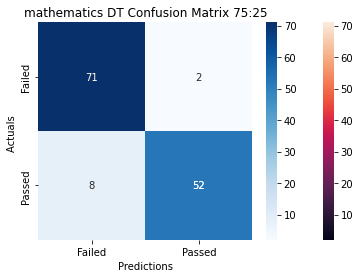

In [16]:
# Make bagging classifier
from sklearn.ensemble import BaggingClassifier


# Create a Decision Tree classifier
gnb_classifier = DecisionTreeClassifier(max_depth=150, max_features='log2', min_samples_split=16,
                       random_state=0)

# Create a BaggingClassifier with Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=gnb_classifier, n_estimators=5, random_state=0)

# Train the BaggingClassifier on the training data
bagging_classifier.fit(pred_train, tar_train)

# Make predictions on the test data
y_pred = bagging_classifier.predict(pred_test)

# Calculate accuracy
accuracy = accuracy_score(tar_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report

print(classification_report(tar_test, y_pred))

from sklearn.metrics import matthews_corrcoef


mcc_score = matthews_corrcoef(tar_test, y_pred)
print("Matthews Correlation Coefficient:", mcc_score)

#Get the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(tar_test, y_pred)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

ax = sns.heatmap(cf_matrix, annot=True,fmt="d", cmap='Blues')

ax.set_title('mathematics DT Confusion Matrix 75:25');
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals ');

ax.xaxis.set_ticklabels(['Failed', 'Passed'])
ax.yaxis.set_ticklabels(['Failed', 'Passed'])
plt.show()



In [17]:
#Program untuk download Tree hasil  bagging classifier
from sklearn.tree import export_graphviz
import graphviz 
import os

# (Visualizations decision tree) ...

# Create a directory to store the visualizations
output_directory = "tree_visualizations_SMOTE bagging"
os.makedirs(output_directory, exist_ok=True)

# Access and visualize individual trees
for i, tree in enumerate(bagging_classifier.estimators_):
    # 1. Ekspor ke string DOT (BUKAN ke file)
    dot_data = export_graphviz(
        tree, 
        feature_names=inputs.columns, 
        class_names=['Passed', 'Failed'], 
        filled=True, 
        rounded=True, 
        out_file=None # Pastikan out_file diset None agar hasilnya berupa string
    )
    
    # 2. Render DOT string menjadi objek Source Graphviz
    graph = graphviz.Source(dot_data)
    
    # 3. Simpan dan render file. 'format' menentukan output (pdf, png, svg, dll.)
    # 'filename' menentukan nama dasar file DOT, dan 'directory' tempat menyimpan output.
    graph.render(
        filename=f'tree_{i}', 
        directory=output_directory, 
        format='pdf', # MEnentukan Format Output (misalnya 'pdf')
        view=False,
        cleanup=True # Menghapus file DOT sementara
    )

print(f"Visualisasi pohon telah disimpan sebagai file PDF di direktori: {output_directory}")

Visualisasi pohon telah disimpan sebagai file PDF di direktori: tree_visualizations_SMOTE bagging


In [ ]:
# python_script_using_SMOTE.txt
# Sudah di Run dan Data sudah tersimpan lalu dipakai untuk model
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_excel(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\student-mat3 untuk smote.XLSX''')

# Create binary target variable
#df["target"] = df["G3"].apply(lambda x: 1 if x >= 10 else 0)

# Drop missing records
df = df.dropna()

# Separate features and target
X = df.drop(columns=["G3"])
y = df["G3"]

# Apply SMOTE to balance data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine results back into a DataFrame
balanced_df = pd.concat(
    [pd.DataFrame(X_resampled, columns=X.columns),
     pd.Series(y_resampled, name="target")],
    axis=1
)

# Save the balanced dataset
balanced_df.to_excel("student-mat3new2.xlsx", index=False)

print("SMOTE balancing complete. Saved as student-mat3new2.xlsx")
